# SHM Ambient Vibration Preprocessing Demo
This Jupyter notebook demonstrates how to preprocess ambient vibration data from a tall building. I loaded data from the previous CSV file I generated, visualized raw signals, applied filtering, ran FFT, and extracted meaningful statistics.

In [1]:
# Step 1: Load Data
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, periodogram

# Edit this path if needed
df = pd.read_csv(r"C:\Imran\METU\Thesis\code\shm_preprocessing_project\data\vibration.csv")
t = df['Time']
x = df['Acceleration']
df.head()

,Time,Acceleration
0,0.00000,0.126349
1,0.01001,-0.165337
2,0.02002,0.825644
3,0.03003,0.793859
4,0.04004,1.036982


## Step 2: Plot Raw Acceleration vs. Time
Visualizing the time-domain signal helps spot outliers, trends, and general data quality. 

Using the data above, I created a figure that measured 10 by 4 inches and plotted acceleration (x) versus time (t) using a thin line (linewidth=0.8) for clarity. I added the graph title and axes labels and applied tight_layout() to make sure that texts weren't clipped and I finally used plt.show() to plot.

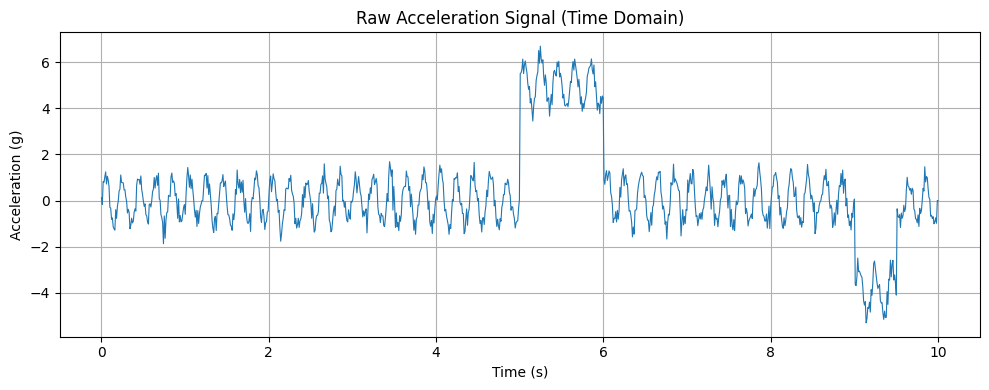

In [2]:
plt.figure(figsize=(10, 4))
plt.plot(t, x, linewidth=0.8)
plt.title('Raw Acceleration Signal (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 3: Apply Bandpass Filter (0.1–1.0 Hz)
Filtering isolates the low-frequency range where wind-induced accelerations usually dominate in tall buildings.

I applied a bandpass filter to the raw acceleration signal to isolate vibrations typically found between 0.1 and 1.0 Hz. The bandpass_filter function defines a 4th-order Butterworth filter by first calculating the normalized low and high cutoff frequencies using the Nyquist frequency (0.5 * fs). I then created the filter coefficients with butter() and applies the filter using filtfilt(), which performed zero-phase filtering to avoid time lag. After defining the sampling frequency fs = 100 Hz, I applied the function to the raw signal x, producing the filtered signal filtered_x. The result was plotted with a green line on a 10x4 inch figure, including appropriate axis labels, a grid, and a descriptive title ("Filtered Acceleration Signal (0.1–1.0 Hz)"). tight_layout() optimizes spacing, and plt.show() displaying the plot.

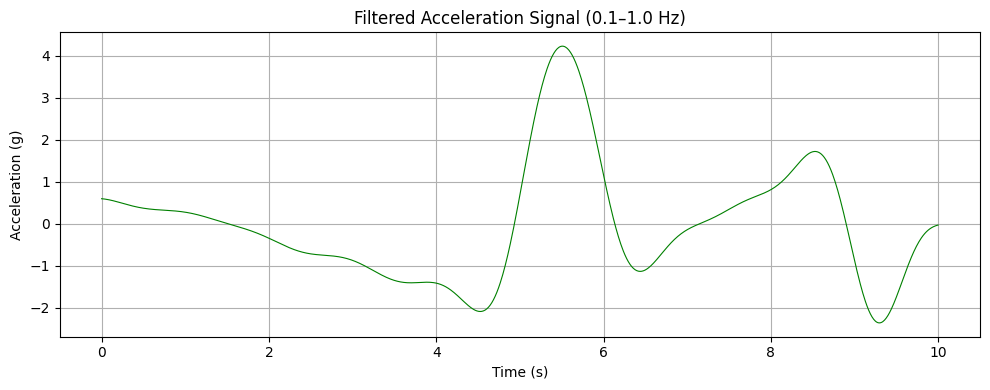

In [3]:
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

fs = 100  # Hz
filtered_x = bandpass_filter(x, 0.1, 1.0, fs)

plt.figure(figsize=(10, 4))
plt.plot(t, filtered_x, linewidth=0.8, color='green')
plt.title('Filtered Acceleration Signal (0.1–1.0 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 4: Power Spectral Density (FFT)
The FFT reveals the dominant frequencies in the signal — for tall buildings, these are typically in the sub-1 Hz range.

I calculated and visualizied the frequency content of the filtered acceleration signal using the Fast Fourier Transform (FFT). The periodogram() function calculated the power spectral density (PSD), returning frequency values f and their corresponding power levels Pxx, based on the filtered signal and sampling rate fs. plt.semilogy(), was used to show the power on a logarithmic scale for better visibility of lower-magnitude frequencies. Again, the chart title and axes were labeled and grid, tight_layout(), and plt.show() were used. 

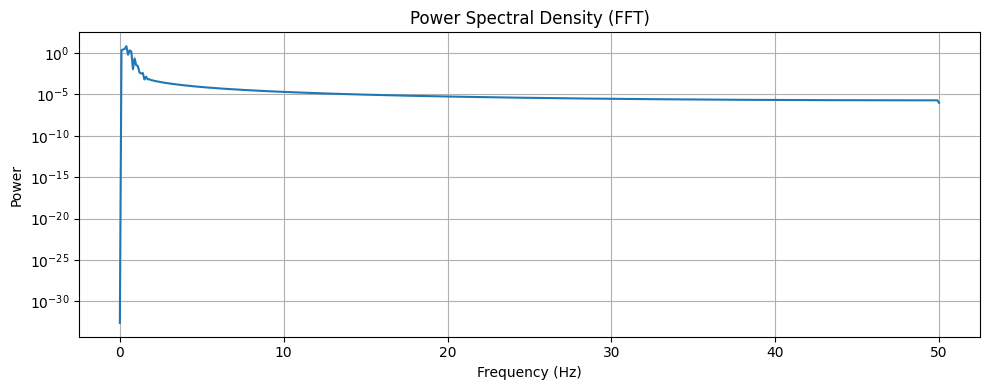

In [4]:
f, Pxx = periodogram(filtered_x, fs)

plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx)
plt.title('Power Spectral Density (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 5: Compute Key Statistics
- RMS acceleration is a measure of overall vibration energy
$$
\text{RMS} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} x_i^2}
$$

- Peak acceleration shows maximum displacement
$$
\text{Peak} = \max \left( \left| x_i \right| \right)
$$

- Dominant frequency is the most energetic mode (often the fundamental mode in real data)
$$
f_{\text{dominant}} = f\left[ \arg\max \left( P_{xx}(f) \right) \right]
$$


In [5]:
import numpy as np
rms = np.sqrt(np.mean(filtered_x**2))
peak = np.max(np.abs(filtered_x))
dominant_freq = f[np.argmax(Pxx)]
print(f'RMS Acceleration: {rms:.3f} g')
print(f'Peak Acceleration: {peak:.3f} g')
print(f'Dominant Frequency: {dominant_freq:.3f} Hz')

RMS Acceleration: 1.402 g
Peak Acceleration: 4.224 g
Dominant Frequency: 0.400 Hz


> **Summary:**
I have processed synthetic ambient vibration data using Python and common SHM signal processing techniques. 